In [1]:
!pip install Pillow

In [1]:
import os
import sys
import math
import logging
import structlog
from pathlib import Path

import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

In [2]:
# Set the logging level
logging.basicConfig(level=logging.INFO, stream=sys.stdout)

### How to use this template

* make sure you have a subfolder named like the Pretalx slug of your conference
* duplicate this template and move it into this folder
* make sure to follow the naming convention `NN_use-case_vI`, where `NN` is a 2-digit number to allow you sorting your notebooks and `I` is an increment to specify a version
* keep the version output from below so that people know with which Pytanis version your notebook runs (important before the 1.0 release)
* if you check in your notebook into git, make sure output containing personal information is cleared before. **We must avoid leaking personal information!**

In [3]:
import pytanis

/home/theodore/.local/share/hatch/env/virtual/pytanis/8czRKDvQ/pytanis/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Be aware that this notebook might only run with the following version
pytanis.__version__ 

'0.0.post1.dev102+gb8670ed.d20230212'

In [127]:
from PIL import Image, ImageDraw, ImageFont
from pytanis.utils import implode
from pytanis.review import Col
from collections import namedtuple
import time

In [21]:
# taken from https://gist.github.com/digitaltembo/eb7c8a7fdef987e6689ee8de050720c4

ALLIGNMENT_LEFT = 0
ALLIGNMENT_CENTER = 1 
ALLIGNMENT_RIGHT = 2
ALLIGNMENT_TOP = 3
ALLIGNMENT_BOTTOM = 4

def text_box(text, image_draw, font, box, horizontal_allignment = ALLIGNMENT_LEFT, vertical_allignment = ALLIGNMENT_TOP, **kwargs):
    x = box[0]
    y = box[1]
    width = box[2]
    height = box[3]
    lines = text.split('\n')
    true_lines = []
    for line in lines:
        if font.getsize(line)[0] <= width:
            true_lines.append(line) 
        else:
            current_line = ''
            for word in line.split(' '):
                if font.getsize(current_line + word)[0] <= width:
                    current_line += ' ' + word 
                else:
                    true_lines.append(current_line)
                    current_line = word 
            true_lines.append(current_line)
    
    x_offset = y_offset = 0
    lineheight = font.getsize(true_lines[0])[1] * 1.2 # Give a margin of 0.2x the font height
    if vertical_allignment == ALLIGNMENT_CENTER:
        y = int(y + height / 2)
        y_offset = - (len(true_lines) * lineheight) / 2
    elif vertical_allignment == ALLIGNMENT_BOTTOM:
        y = int(y + height)
        y_offset = - (len(true_lines) * lineheight)
    
    for line in true_lines:
        linewidth = font.getsize(line)[0]
        if horizontal_allignment == ALLIGNMENT_CENTER:
            x_offset = (width - linewidth) / 2
        elif horizontal_allignment == ALLIGNMENT_RIGHT:
            x_offset = width - linewidth
        image_draw.text(
            (int(x + x_offset), int(y + y_offset)),
            line,
            font=font,
            **kwargs
        )
        y_offset += lineheight

# helper function for fonts
def font(font_path, size=12):
    return ImageFont.truetype(font_path, size=size, encoding="unic")

In [104]:
TalkInfo = namedtuple("talkinfo", ["name", "affiliation","title", "key"])

template_path = "./40_talk_image/template.png"
font_path = "./40_talk_image/Roboto-Regular.ttf"

In [105]:
talkInfo = TalkInfo(
    name="Theodore Meynard",
    affiliation="GetYourGuide",
    title="MLOps in practice: our journey from batch to real-time inference",
    key="QLCNN9"
)


/tmp/ipykernel_51722/2630552659.py:17: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(line)[0] <= width:
/tmp/ipykernel_51722/2630552659.py:22: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(current_line + word)[0] <= width:
/tmp/ipykernel_51722/2630552659.py:30: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  lineheight = font.getsize(true_lines[0])[1] * 1.2 # Give a margin of 0.2x the font height
/tmp/ipykernel_51722/2630552659.py:39: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  linewidth = font.getsize(line)[0]


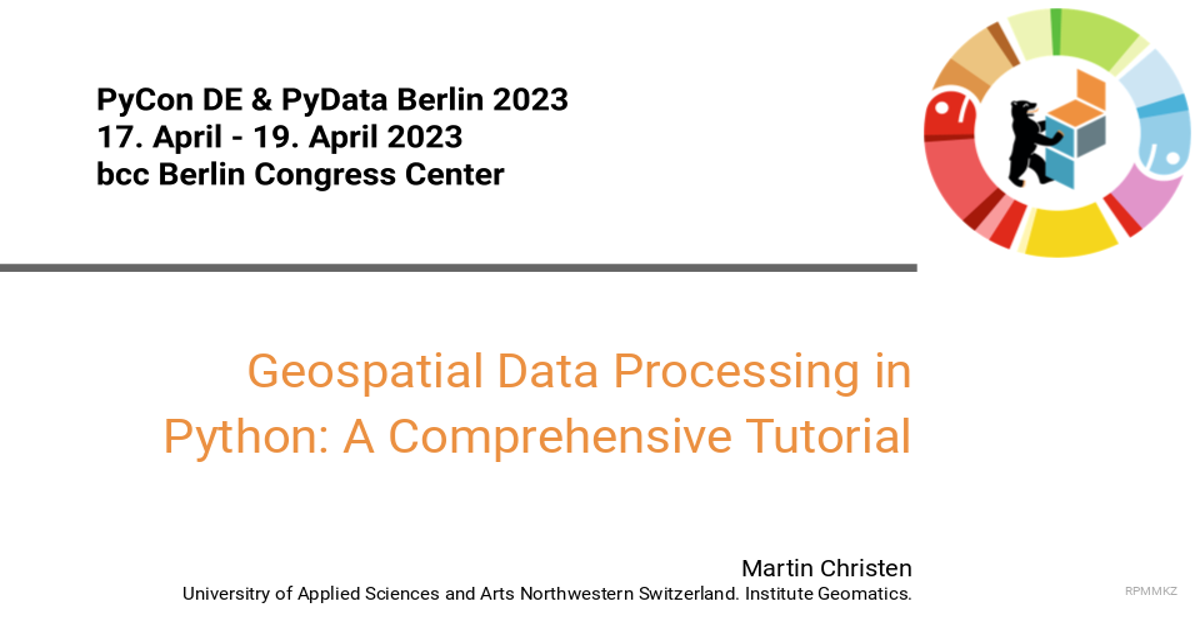

In [136]:
def create_social_card(talkInfo: TalkInfo):

    img = Image.open(template_path)
    imgDraw = ImageDraw.Draw(img)

    text_box(
        text=talkInfo.title,
        image_draw=imgDraw,
        font=font(font_path, 40),
        box=(80, 200, 650, 300),
        horizontal_allignment=ALLIGNMENT_RIGHT,
        vertical_allignment=ALLIGNMENT_CENTER,
        fill="#eb9041",
    )

    text_box(
        text=talkInfo.name,
        image_draw=imgDraw,
        font=font(font_path, 20),
        box=(80, 475, 650, 475),
        horizontal_allignment=ALLIGNMENT_RIGHT,
        fill="#000000",
    )

    text_box(
        text=talkInfo.affiliation,
        image_draw=imgDraw,
        font=font(font_path, 15),
        box=(80, 500, 650, 500),
        horizontal_allignment=ALLIGNMENT_RIGHT,
        fill="#000000",
    )

    text_box(
        text=talkInfo.key,
        image_draw=imgDraw,
        font=font(font_path, 10),
        box=(900, 500, 900, 500),
        fill="#aaaaaa",
    )

    return img.resize((1200, 630))
create_social_card(talkInfo)

In [56]:
from pytanis import PretalxClient
from pytanis.pretalx import speakers_as_df, subs_as_df

In [82]:
pretalx_client = PretalxClient(blocking=True)
pkrs_count, spkrs = pretalx_client.speakers("pyconde-pydata-berlin-2023", params={"questions": "all"})
subs_count, subs = pretalx_client.submissions("pyconde-pydata-berlin-2023",  params={"questions": "all", "state": "accepted"})

100%|██████████| 43/43 [00:02<00:00, 16.89it/s]


In [83]:
spkrs_df = speakers_as_df(spkrs, with_questions=True)
subs_df = subs_as_df(subs, with_questions=True)

In [90]:
subs_df = subs_df.explode([Col.speaker_code, Col.speaker_name])
subs_df = pd.merge(subs_df, spkrs_df.drop(columns=[Col.speaker_name, Col.submission]), on=Col.speaker_code)
subs_df = implode(subs_df, [col for col in spkrs_df if col not in [Col.submission]])

In [137]:

for _, submission in subs_df.iterrows():
    names = " & ".join(submission["Speaker name"])
    affiliation_list = submission["Q: Company / Institute"]
    affiliation = " " if np.nan in affiliation_list else " & ".join(affiliation_list)
    affiliation = affiliation.replace("\n", "")
    title = submission["Title"]
    key = submission["Submission"]
    talkInfo = TalkInfo(
        name=names,
        affiliation=affiliation,
        title=submission["Title"],
        key=key,
    )
    img = create_social_card(talkInfo)
    img.save(f"40_talk_image/output/{key}.png")
    time.sleep(0.1)



/tmp/ipykernel_51722/2630552659.py:17: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(line)[0] <= width:
/tmp/ipykernel_51722/2630552659.py:22: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(current_line + word)[0] <= width:
/tmp/ipykernel_51722/2630552659.py:30: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  lineheight = font.getsize(true_lines[0])[1] * 1.2 # Give a margin of 0.2x the font height
/tmp/ipykernel_51722/2630552659.py:39: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  linewidth = font.getsize(line)[0]
